# Retail Customer Analysis Summative Lab
## Understanding Customer Behavior Across Store Locations

### Introduction

This summative lab bridges the concepts and techniques learned throughout the course with their practical application to a real-world industry scenario. You will step into the role of a junior data analyst for a retail company and apply your skills to evaluate customer behavior, satisfaction, and promotional impacts. By following the outlined process, you will gain experience in experimental design, statistical testing, and actionable decision-making.

Your task is not only to conduct the analysis but also to reflect on how these techniques help solve real-world problems that businesses face daily.

By completing this lab, you will have:
- Practiced designing and executing statistical analyses in a real-world scenario.
- Reinforced your understanding of test selection and assumptions.
- Applied statistical results to business decision-making.
- Developed skills in communicating insights effectively through visualizations and reports.

### Business Scenario Questions:
Imagine you are a junior data analyst working for a retail company that operates stores in three distinct regions: City Center, Suburb, and Rural. Your manager has tasked you with analyzing customer behavior and preferences across these locations. The goal is to help the company answer two key questions:
1. Do customer spending patterns, satisfaction levels, and product preferences differ across store locations?
2. Do promotional periods result in significantly higher spending compared to non-promotional periods?

Spending Across Location:

- Business-relevant MDE: Absolute difference in spending of 15% or more
- Justification: This represents enough of a difference to warrant location-specific strategies (inventory, staffing, etc.)


Ratings Across Locations:

- Business-relevant MDE: 1.0 point difference between locations
- Justification: On a 10-point scale, a one point difference is noticeable and actionable for customer service improvements

Promotional Spending:

- Business-relevant MDE: A $15 increase from non-promotional periods
- Justification: Promotional costs typically reduce margins by ~15-20%. Need at least 25% increase in spending to justify promotional costs. This aligns with industry standards for promotional ROI

Your task involves designing and conducting an analysis using the provided dataset to derive actionable insights. You will apply statistical concepts and techniques such as experimental design, test selection, hypothesis testing, and result interpretation. This process mimics real-world industry scenarios where junior analysts evaluate business performance using data.

The data focuses on four variables:
- Amount spent by customers (in dollars)
- Customer satisfaction ratings (scale of 1 to 10)
- Product category preferences (Electronics, Clothing, Groceries)
- Purchase type (Promotional vs. Non-Promotional)

Your analysis will inform decision-making around marketing strategies, store operations, and promotional campaigns.

### Setup

In this cell, import all the libraries you'll need for your analysis. Consider which libraries you'll need for:
- Data manipulation
- Statistical analysis
- Data visualization

In [1]:
# Import relevant libraries
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

/Users/faheemunnisasyeda/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/faheemunnisasyeda/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Part 1: Experimental Design

#### 1.1 Hypothesis Formulation

For each of the following analyses, state your null and alternative hypotheses in both statistical and plain language:

1. Spending across store locations
2. Customer satisfaction across locations
3. Promotional vs non-promotional spending
4. Product category preferences across locations

[Write your hypotheses here]

**Reflective Question: Explain the concept of Minimum Detectable Effect (MDE) and why it is important.**

[Write your answer here]

### Part 2: Data Exploration

#### 2.1 Load and Examine the Dataset

Load the dataset and perform initial data quality checks:
- Check for missing values
- Examine data types
- Look for inconsistencies
- Generate summary statistics

In [5]:
# Load Data
df=pd.read_csv("retail_store_customer_data.csv")
df.head()

,Store_Location,Customer_Satisfaction,Product_Category,Purchase_Type,Amount_Spent
0,Rural,5.6,Groceries,Non-Promotional,40.45
1,City Center,9.7,Clothing,Promotional,53.20
2,Rural,4.4,Electronics,Non-Promotional,42.77
3,Rural,4.2,Clothing,Promotional,42.08
4,City Center,9.3,Clothing,Non-Promotional,84.25


In [6]:
df.isnull().sum()

Store_Location           0
Customer_Satisfaction    0
Product_Category         0
Purchase_Type            0
Amount_Spent             0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Store_Location         1500 non-null   object 
 1   Customer_Satisfaction  1500 non-null   float64
 2   Product_Category       1500 non-null   object 
 3   Purchase_Type          1500 non-null   object 
 4   Amount_Spent           1500 non-null   float64
dtypes: float64(2), object(3)
memory usage: 58.7+ KB


In [9]:
df.describe()

,Customer_Satisfaction,Amount_Spent
count,1500.00000,1500.000000
mean,6.99520,59.915973
std,1.65286,19.551829
min,1.00000,15.550000
25%,5.80000,44.170000
50%,7.00000,58.015000
75%,8.20000,72.582500
max,10.00000,128.130000


In [11]:
for col in ['Store_Location', 'Purchase_Type', 'Product_Category']:
    print(f"{col}: {df[col].unique()}")

Store_Location: ['Rural' 'City Center' 'Suburb']
Purchase_Type: ['Non-Promotional' 'Promotional']
Product_Category: ['Groceries' 'Clothing' 'Electronics']


In [8]:
# Summary for categorical variables
df.describe(include='object')

,Store_Location,Product_Category,Purchase_Type
count,1500,1500,1500
unique,3,3,2
top,City Center,Electronics,Promotional
freq,520,583,888


#### 2.2 Data Visualizations

Create visualizations to understand the distribution of key variables:
- Spending patterns across locations
- Satisfaction ratings distribution
- Product category preferences
- Promotional vs non-promotional spending

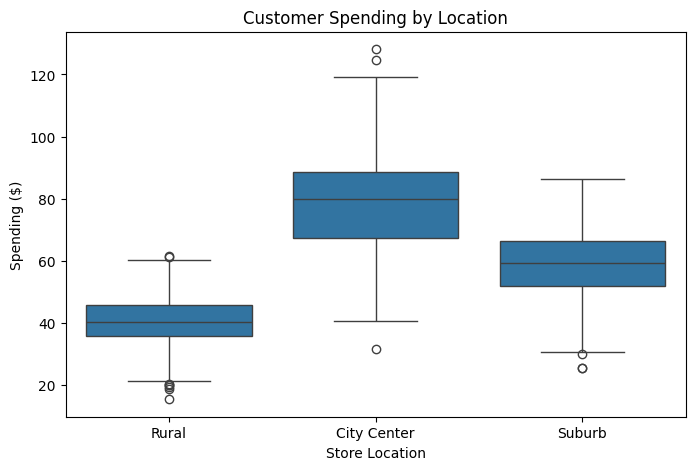

In [13]:
# Visualize data
# Spending patterns across locations
plt.figure(figsize=(8,5))
sns.boxplot(x="Store_Location", y="Amount_Spent", data=df)
plt.title("Customer Spending by Location")
plt.xlabel("Store Location")
plt.ylabel("Spending ($)")
plt.show()

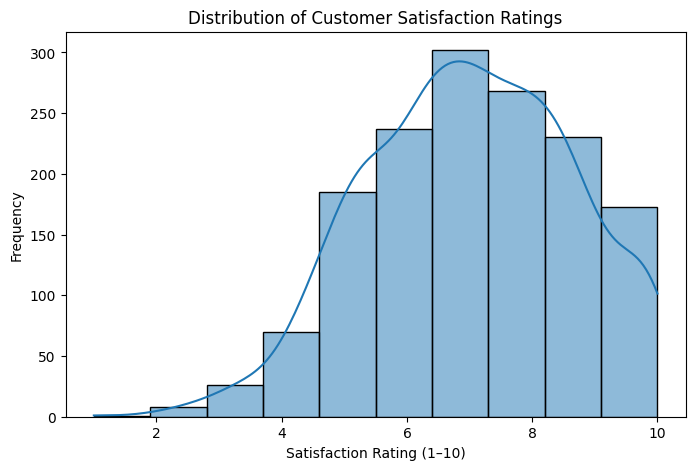

In [23]:
# Satisfaction ratings distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Customer_Satisfaction"], bins=10, kde=True)
plt.title("Distribution of Customer Satisfaction Ratings")
plt.xlabel("Satisfaction Rating (1–10)")
plt.ylabel("Frequency")
plt.show()

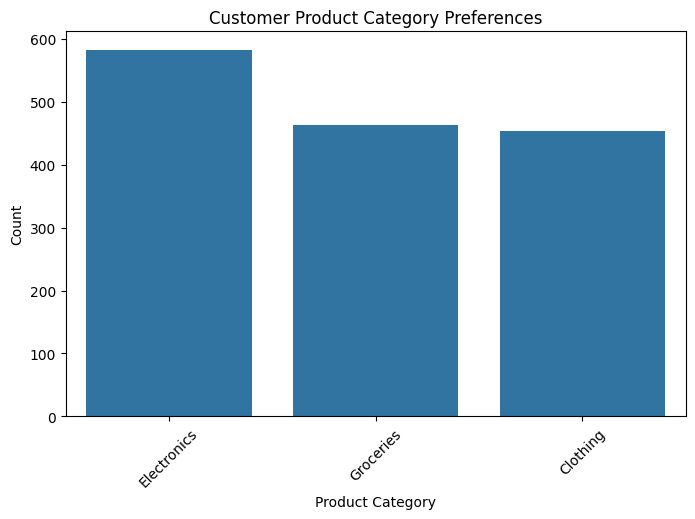

In [25]:
# Product category preferences
plt.figure(figsize=(8,5))
sns.countplot(x="Product_Category", data=df, order=df["Product_Category"].value_counts().index)
plt.title("Customer Product Category Preferences")
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

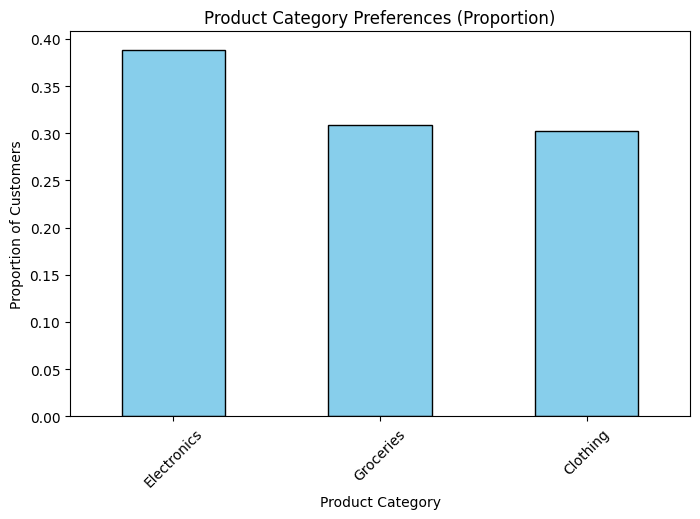

In [24]:
plt.figure(figsize=(8,5))
(df["Product_Category"].value_counts(normalize=True)
   .plot(kind="bar", color="skyblue", edgecolor="black"))
plt.title("Product Category Preferences (Proportion)")
plt.xlabel("Product Category")
plt.ylabel("Proportion of Customers")
plt.xticks(rotation=45)
plt.show()

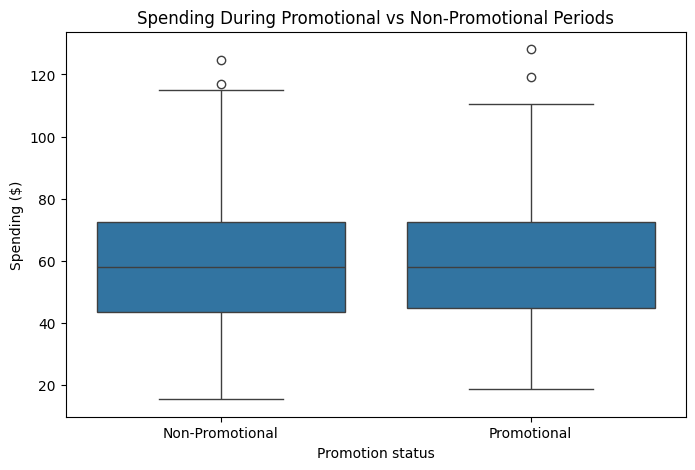

In [27]:
# Promotional vs non-promotional spending
plt.figure(figsize=(8,5))
sns.boxplot(x="Purchase_Type", y="Amount_Spent", data=df)
plt.title("Spending During Promotional vs Non-Promotional Periods")
plt.xlabel("Promotion status")
plt.ylabel("Spending ($)")
plt.show()

#### 2.3 Test Assumptions

Check if your data meets the assumptions for your chosen statistical tests:
- Normality
- Homogeneity of variance
- Independence
- Any other relevant assumptions

Shapiro-Wilk test statistic=0.978, p-value=0.000


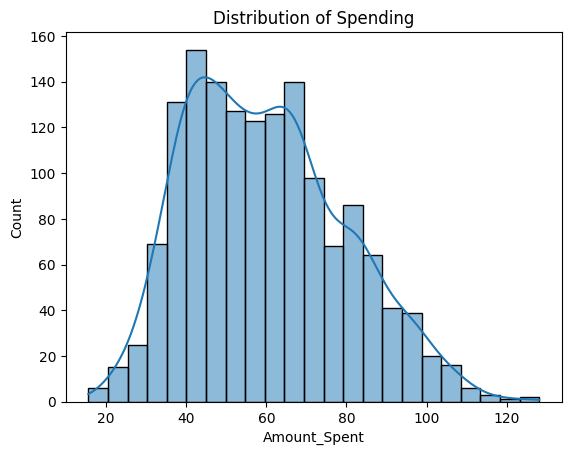

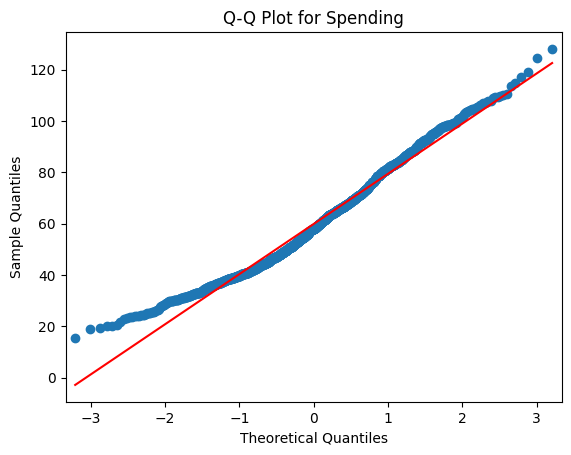

In [29]:
# Assumption tests and checks 
# Normality
# If p > 0.05, fail to reject H₀ → data looks normal enough.
# If p < 0.05, reject H₀ → data deviates from normality.
stat, p = stats.shapiro(df["Amount_Spent"].dropna())
print(f"Shapiro-Wilk test statistic={stat:.3f}, p-value={p:.3f}")

# Histogram + KDE
sns.histplot(df["Amount_Spent"], kde=True)
plt.title("Distribution of Spending")
plt.show()

# Q-Q plot 
import statsmodels.api as sm
sm.qqplot(df["Amount_Spent"], line='s')
plt.title("Q-Q Plot for Spending")
plt.show()

In [30]:
# Homogeneity of variance ->Groups being compared should have similar variances. Test: Levene’s test or Bartlett’s test (Levene is more robust).
# if p > 0.05, variances are equal enough → assumption holds.
# If p < 0.05, variances differ → consider Welch’s ANOVA / Welch’s t-test.
groups = [g["Amount_Spent"].values for name, g in df.groupby("Store_Location")]
stat, p = stats.levene(*groups)
print(f"Levene’s test statistic={stat:.3f}, p-value={p:.3f}")

Levene’s test statistic=106.410, p-value=0.000


In [ ]:
# Independence -> Observations must be independent of each other.

In [ ]:
# Any other relevant assumptions


#### 2.4 Choose Appropriate Statistical Tests

Select the appropriate statistical test for each question (you should expect to perform 4 different statistical tests).

1. Spending across store locations
2. Customer satisfaction across locations
3. Promotional vs non-promotional spending
4. Product category preferences across locations

NOTE: Use [Dunn's Test](https://scikit-posthocs.readthedocs.io/en/latest/generated/scikit_posthocs.posthoc_dunn.html) for Non-Parametric Post-hoc if needed. You might need to pip install scikit-postdoc package. You want to set p_adjust='bonferroni' for Dunn's Test.
1. we’ll select the appropriate statistical test based on:

2. The type of dependent variable (continuous, ordinal, categorical).

3. The number of groups being compared. Results from the assumption checks (normality, homogeneity of variance, independence).



**Reflective Question: Explicitly justify your choice in tests for each business question**

1. Spending across locations → ANOVA / Kruskal–Wallis

Variable type: Continuous (Spending) vs. Categorical (3 store locations).

Test:

     If assumptions hold → One-way ANOVA.

     If assumptions violated → Kruskal–Wallis test, with Dunn’s post-hoc (Bonferroni correction).

Justification: We are comparing mean spending across 3+ groups. ANOVA checks if there is any difference; post-hoc tests locate where differences occur.

2. Satisfaction across locations → ANOVA / Kruskal–Wallis

Variable type: Ordinal/continuous (Satisfaction rating on 1–10 scale) vs. Categorical (3 store locations).

Test:

    If assumptions hold → One-way ANOVA.

    If assumptions violated → Kruskal–Wallis + Dunn’s post-hoc.

Justification: Ratings are numeric but may not be perfectly normal. Kruskal–Wallis is more robust to non-normality.
3. Promo vs. Non-promo spending → t-test / Mann–Whitney U

Variable type: Continuous (Spending) vs. Binary categorical (Promotion = Yes/No).

Test:

    If assumptions hold → Independent samples t-test.

    If assumptions violated → Mann–Whitney U test.

Justification: We are comparing two groups. t-test works under normality; Mann–Whitney is safer if data is skewed.

4. Product preferences across locations → Chi-square test

Variable type: Categorical (Product category) vs. Categorical (Store location).

Test: Chi-square test of independence.

Justification: Both variables are categorical, and we want to know if preferences depend on location. If Chi-square assumptions fail (expected counts < 5), use Fisher’s exact test.


### Part 3: Statistical Analysis

Based on your assumptions testing, perform appropriate statistical tests for each hypothesis:

#### 3.1 Spending Across Locations

In [35]:
# Conduct your analysis of spending patterns here

import scikit_posthocs as sp
# Group spending by location
groups = [g["Amount_Spent"].values for name, g in df.groupby("Store_Location")]

# --- Parametric (ANOVA) ---
anova_stat, anova_p = stats.f_oneway(*groups)
print(f"ANOVA: F-statistic={anova_stat:.3f}, p-value={anova_p:.3f}")

# --- If normality/variance assumptions fail → Kruskal-Wallis ---
kw_stat, kw_p = stats.kruskal(*groups)
print(f"Kruskal-Wallis: H-statistic={kw_stat:.3f}, p-value={kw_p:.3f}")

# --- Post-hoc (if Kruskal-Wallis is significant) ---
posthoc_dunn = sp.posthoc_dunn(df, val_col="Amount_Spent", group_col="Store_Location", p_adjust='bonferroni')
print(posthoc_dunn)

ANOVA: F-statistic=1386.970, p-value=0.000
Kruskal-Wallis: H-statistic=1040.854, p-value=0.000
               City Center          Rural        Suburb
City Center   1.000000e+00  2.502288e-227  1.425221e-45
Rural        2.502288e-227   1.000000e+00  4.018599e-70
Suburb        1.425221e-45   4.018599e-70  1.000000e+00


#### 3.2 Customer Satisfaction Analysis

In [ ]:
# Analyze customer satisfaction here
None

#### 3.3 Promotional Impact Analysis

In [ ]:
# Analyze the impact of promotions here


#### 3.4 Product Category Analysis

In [ ]:
# Analyze product category preferences here
None

### Part 4: Results Interpretation

For each analysis, provide:
1. A clear statement of the statistical results
2. The practical significance of these findings
3. Visualizations that support your conclusions
4. Specific business recommendations

In [ ]:
# Calculate effect sizes - contrast with MDE
None

**Reflective Question: Results - Clearly state whether the null hypotheses were rejected or not. Frame this in the business question context. Use effect sizes (e.g., Cohen’s d, eta squared) to contextualize the significance of your results.**

[Write your answer here]

**Reflective Question: Recommendations - Explain the practical implications of the results. What should the company do based on your findings about spending, satisfaction, or product preferences?**

[Write your answer here]


In [ ]:
# Create visualizations to support results - Create new cells as needed
None

### Part 5: Reflection

Discuss:
1. The strengths and limitations of your analysis
2. Any assumptions or potential biases in the data
3. Suggestions for additional data collection
4. How this analysis could be improved

**Reflective Question: Explain the importance of experimental design and sufficient sample size in conducting a robust analysis. Identify any limitations in the dataset or analysis (e.g., potential biases, unmeasured variables) and suggest additional data the company could collect to improve future analyses.**

[Write your reflection here]

In [ ]:
%pip install scikit-posthocs

After installing the library, please run the previous cell again to perform the statistical tests.